### Importing packeges

In [1]:
import preprocessor as pp
import pandas as pd
import numpy as np
import myplot as mpf

### Ages: Cancer registry data

In [2]:
filenames = [r'data_files/kreftregisteret_women_norge.xlsx', r'data_files/munnoganus_kvinner.xlsx', 
             r'data_files/livmorlegemeoglivmoruspesifisert.xlsx', r'data_files/reseptregisteret_women_norge.xls']

files = []
for i in range(len(filenames)):
    files.append(pp.excel_lines(filenames[i]))

In [3]:
cancer_registry = pd.DataFrame(files[0], columns= ['Kreftform','Kjønn','Alder','År','Tilfeller','Personår',
                                                 'Insidensrate'])

In [4]:
cancer_registry

,Kreftform,Kjønn,Alder,År,Tilfeller,Personår,Insidensrate
0,Livmorhals,Kvinne,00–09,2004,0,291240.0,0.000000
1,Livmorhals,Kvinne,00–09,2005,0,290272.0,0.000000
2,Livmorhals,Kvinne,00–09,2006,0,289521.0,0.000000
3,Livmorhals,Kvinne,00–09,2007,0,289498.0,0.000000
4,Livmorhals,Kvinne,00–09,2008,0,290810.5,0.000000
5,Livmorhals,Kvinne,00–09,2009,0,292988.0,0.000000
6,Livmorhals,Kvinne,00–09,2010,0,295152.0,0.000000
7,Livmorhals,Kvinne,00–09,2011,0,297324.5,0.000000
8,Livmorhals,Kvinne,00–09,2012,0,300102.5,0.000000
9,Livmorhals,Kvinne,00–09,2013,0,302618.5,0.000000


In [5]:
cases_all_years = []
labels = []
num_years = 14
for j in range(num_years):
    labels.append('Year: '+str(cancer_registry['År'][j])+'')
    cases_per_year = []
    for i in range(len(np.array(cancer_registry['År']))):
        
        if cancer_registry['År'][i] == cancer_registry['År'][j]:
            
            cases_per_year.append(cancer_registry['Tilfeller'][i])
    
    cases_all_years.append(np.array(cases_per_year))  

In [6]:
#print(labels)
#cases_all_years

### Ages: Women cancer register in Norway

In [7]:
### X axis tick label
ages = []
for i in range(9):
    ages.append(cancer_registry['Alder'][i*num_years])

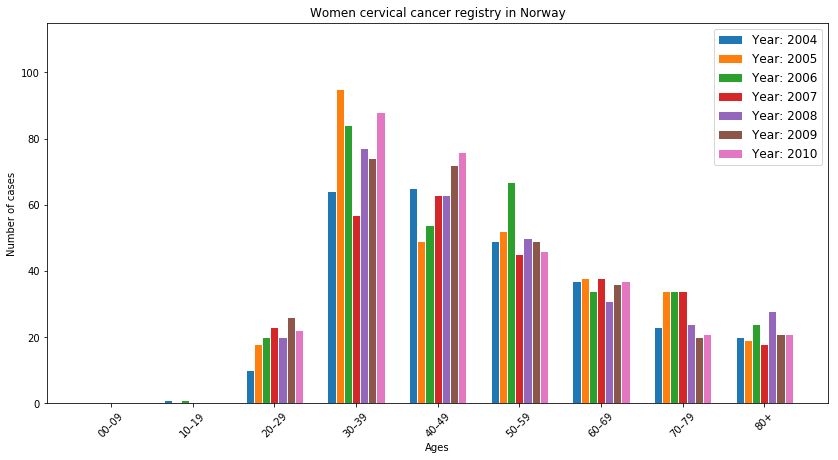

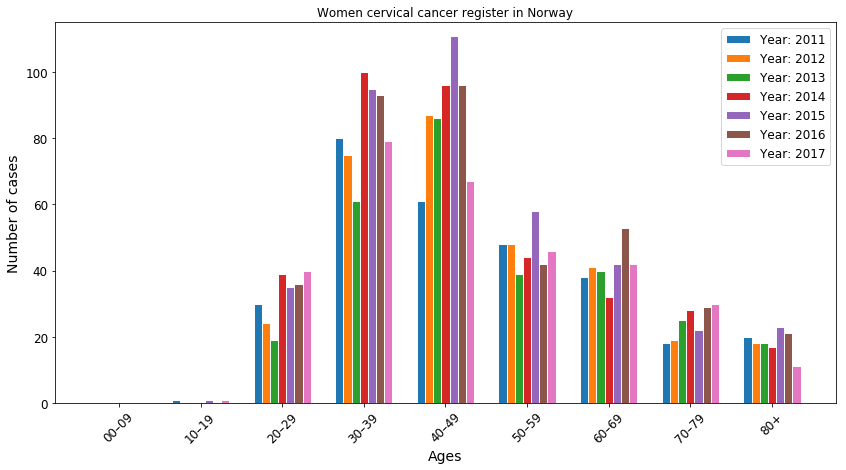

In [8]:
fig, ax = mpf.barplot(ages, cases_all_years[0:7], titl='Women cervical cancer registry in Norway', Xlabel='Ages', 
                       Ylabel='Number of cases', width = 0.9)
ax.set_ylim([0,115])
ax.legend(labels[0:7])
## saving figure
fig.savefig("plots/Female/Women_cervical_cancer_bar1.png")

fig, ax = mpf.barplot(ages, cases_all_years[7:], titl='Women cervical cancer register in Norway', Xlabel='Ages', 
                       Ylabel='Number of cases', width = 0.9)
ax.set_ylim([0,115])
ax.legend(labels[7:])
fig.savefig("plots/Female/Women_cervical_cancer_bar2.png")

In [9]:
x = np.linspace(0,1,9)

### Incidence case

In [10]:
cases_all_years = []
num_years = 14
for j in range(num_years):
    labels.append('Year: '+str(cancer_registry['År'][j])+'')
    cases_per_year = []
    for i in range(len(np.array(cancer_registry['År']))):
        
        if cancer_registry['År'][i] == cancer_registry['År'][j]:
            
            cases_per_year.append(cancer_registry['Insidensrate'][i])
    
    cases_all_years.append(np.array(cases_per_year))  

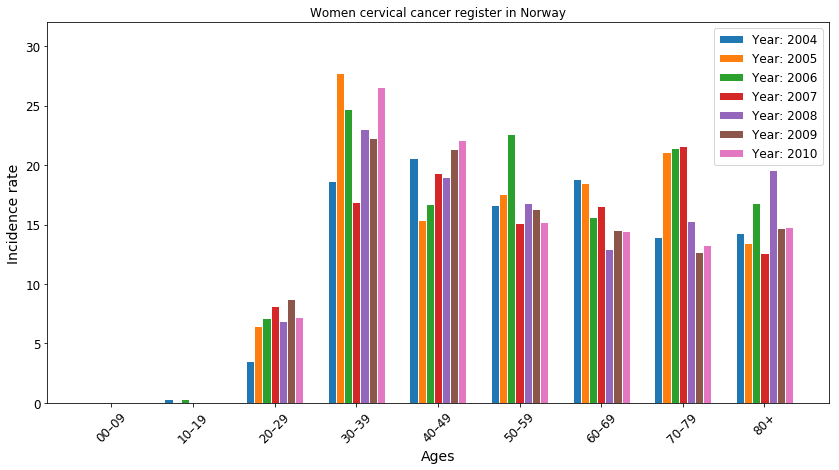

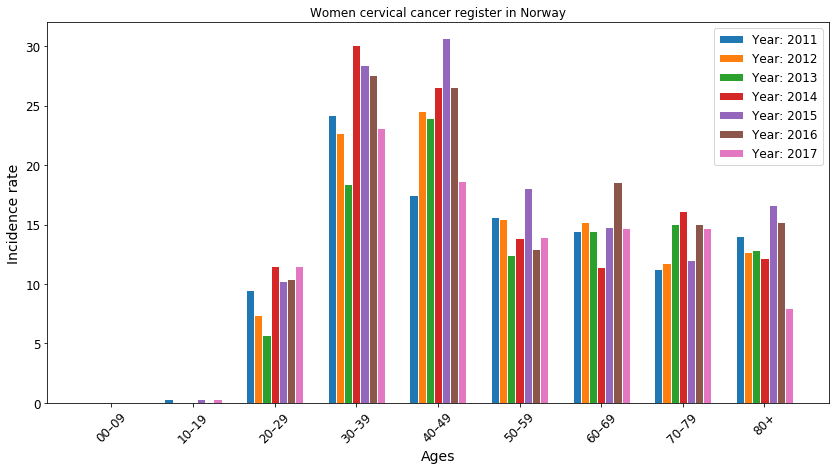

In [11]:
ages = []
for i in range(9):
    ages.append(cancer_registry['Alder'][i*num_years])
    
fig, ax = mpf.barplot(ages, cases_all_years[0:7], titl='Women cervical cancer register in Norway', Xlabel='Ages', 
                       Ylabel='Incidence rate', width = 0.9)
ax.set_ylim([0,32])
ax.legend(labels[0:7])
## saving figure
fig.savefig("plots/Female/Women_cervical_cancer_incidence_bar1.png")

fig, ax = mpf.barplot(ages, cases_all_years[7:], titl='Women cervical cancer register in Norway', Xlabel='Ages', 
                       Ylabel='Incidence rate', width = 0.9)
ax.set_ylim([0,32])
ax.legend(labels[7:])
## saving figure
fig.savefig("plots/Female/Women_cervical_cancer_incidence_bar2.png")

### Prescription Database

In [12]:
dataframe = files[3][8:293]
pd_registry = dataframe

pd_registry['Year'] = dataframe['Unnamed: 1']
pd_registry['Age'] = dataframe['Unnamed: 2']
pd_registry['Gender'] = dataframe['Unnamed: 3']
pd_registry['Cases'] = dataframe['Unnamed: 6']

for i in range(1,9):
    # Dropping old columns
    pd_registry.drop(columns = ['Unnamed: '+str(i)+''], inplace = True)
    
pd_registry.drop(columns = ['Report date: 17/06/2019 14:42'], inplace = True)

/Users/luxiusmmm/Library/Python/3.6/lib/python/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/Users/luxiusmmm/Library/Python/3.6/lib/python/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/Users/luxiusmmm/Library/Python/3.6/lib/python/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See t

In [13]:
#pd_registry

In [14]:
pd_year_label = []
for i in range(4,10):
    pd_year_label.append( 'Year: 200'+str(i)+'' )
for i in range(10,19):
    pd_year_label.append( 'Year: 20'+str(i)+'' )

pd_age = np.array(pd_registry['Age'][0:19])

pd_data = []
for i in range(len(pd_year_label)):
    start = i*len(pd_age)
    end = (1 + i)*len(pd_age)
    
    pd_data.append( np.array(pd_registry['Cases'][start:end]) )

pd_data2 = []
for i in range(len(pd_data)):
    for j in range(len(pd_data[i])):
        if pd_data[i][j] == 'under 5':
            pd_data[i][j] = 2
            
    pd_data2.append( pd_data[i] )

pd_cases = []
for i in range(len(pd_data2)):
    pd_data3 = []
    for j in range(0,len(pd_data2[i])-3,2):
        pd_data3.append( pd_data2[i][j] + pd_data2[i][j+1])
    
    # last three 
    pd_data3.append( pd_data2[i][j+2] + pd_data2[i][j+3] + pd_data2[i][j+4])
    
    pd_cases.append( pd_data3 )

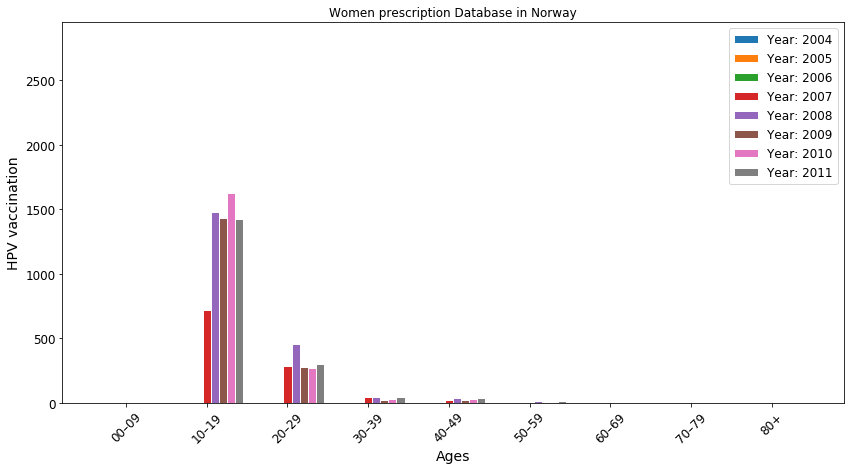

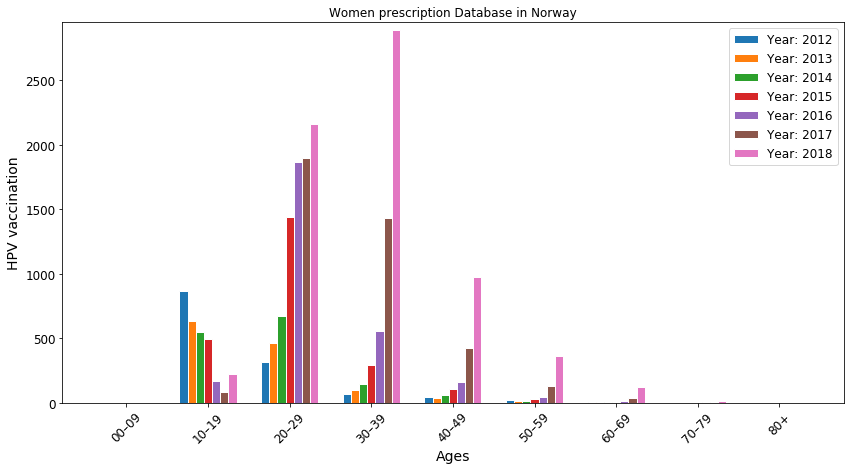

In [15]:
fig, ax = mpf.barplot(ages, pd_cases[0:8], titl='Women prescription Database in Norway', Xlabel='Ages',
                      Ylabel='HPV vaccination', width = 0.9)
ax.set_ylim([0,2950])
ax.legend(pd_year_label[0:8])

fig, ax = mpf.barplot(ages, pd_cases[8:], titl='Women prescription Database in Norway', Xlabel='Ages', 
                      Ylabel='HPV vaccination', width = 0.9)
ax.set_ylim([0,2950])
ax.legend(pd_year_label[8:])

### Vaccine and cancer in the same plot

In [16]:
x = np.linspace(0,len(ages)-1, 9)
filenames = [r'data_files/kreftregisteret_women_norge.xlsx',r'data_files/munnoganus_kvinner.xlsx',
             r'data_files/livmorlegemeoglivmoruspesifisert.xlsx']

c_livmorhals = pp.excel_extract(filenames[0], keyword = ['År','all'], num_parameter = num_years,
                                case = 'Insidensrate', cancer_type = 'Livmorhals')

c_A = pp.excel_extract(filenames[1], keyword = ['År','all'], num_parameter = num_years, 
                       case = 'Insidensrate', cancer_type = 'Anus')
c_MO = pp.excel_extract(filenames[1], keyword = ['År','all'], num_parameter = num_years, 
                        case = 'Insidensrate', cancer_type = 'Munn, andre')

c_livmorlegeme = pp.excel_extract(filenames[2], keyword = ['År','all'], num_parameter = num_years,
                                  case = 'Insidensrate', cancer_type = 'Livmorlegeme')
c_livmor = pp.excel_extract(filenames[2], keyword = ['År','all'], num_parameter = num_years,
                            case = 'Insidensrate', cancer_type = 'Livmor, usesifisert')

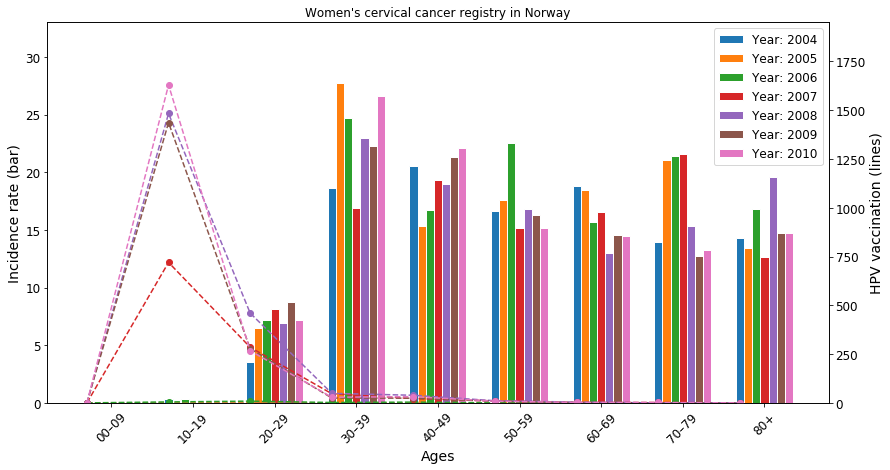

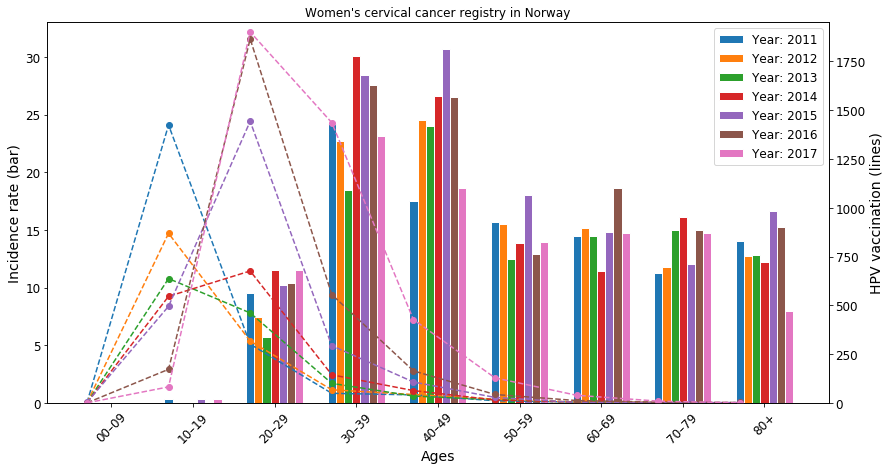

In [17]:
### Cervical cancer
#---------------------------------------------------------------------------------------------------------------------
fig, ax = mpf.barplot(ages, c_livmorhals[0:7], titl="Women's cervical cancer registry in Norway", 
                      Xlabel='Ages', Ylabel='Incidence rate (bar)', width = 0.9)
ax.set_ylim([0,33])
ax2 = ax.twinx()
for i in range(7):
    ax2.plot(x, pd_cases[i], 'o--')
ax.legend(labels[0:7])
ax2.set_ylabel('HPV vaccination (lines)')
ax2.set_ylim([0,1950])
fig.savefig("plots/Female/Vaccine_cancer(cervical)_femalebar1.png")

#
fig, ax = mpf.barplot(ages, c_livmorhals[7:], titl="Women's cervical cancer registry in Norway", 
                      Xlabel='Ages', Ylabel='Incidence rate (bar)', width = 0.9)
ax.set_ylim([0,33])
ax2 = ax.twinx()
for i in range(7, len(c_livmorhals)):
    ax2.plot(x, pd_cases[i], 'o--')
ax.legend(labels[7:])
ax2.set_ylabel('HPV vaccination (lines)')
ax2.set_ylim([0,1950])
fig.savefig("plots/Female/Vaccine_cancer(cervical)_femalebar2.png")
#---------------------------------------------------------------------------------------------------------------------

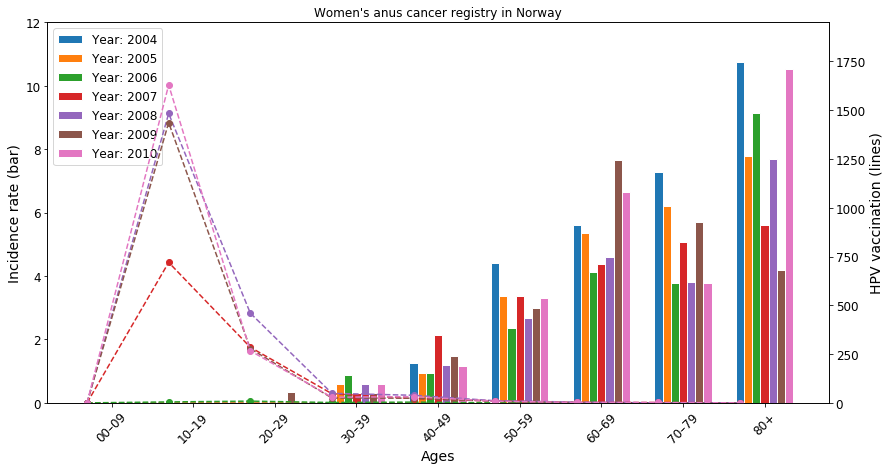

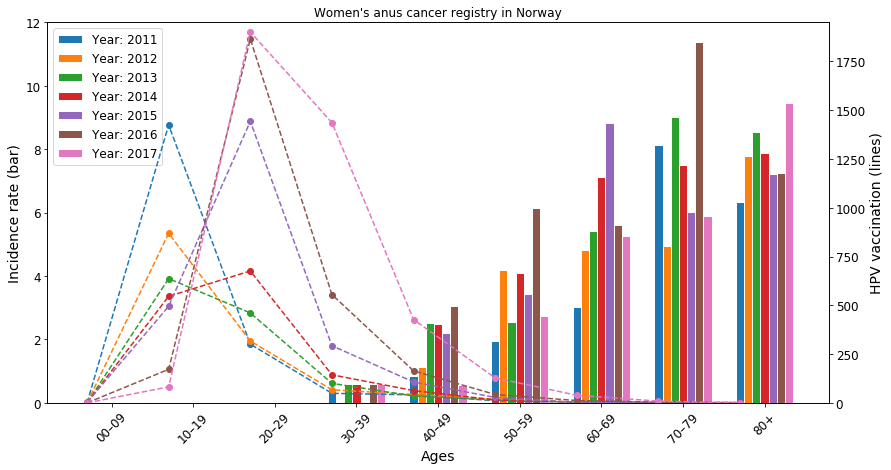

In [18]:
### Anus cancer
#---------------------------------------------------------------------------------------------------------------------
fig, ax = mpf.barplot(ages, c_A[0:7], titl="Women's anus cancer registry in Norway", 
                      Xlabel='Ages', Ylabel='Incidence rate (bar)', width = 0.9)
ax.set_ylim([0,12])
ax2 = ax.twinx()
for i in range(7):
    ax2.plot(x, pd_cases[i], 'o--')
ax.legend(labels[0:7])
ax2.set_ylabel('HPV vaccination (lines)')
ax2.set_ylim([0,1950])
fig.savefig("plots/Female/Vaccine_cancer(anus)_femalebar1.png")

#
fig, ax = mpf.barplot(ages, c_A[7:], titl="Women's anus cancer registry in Norway", 
                      Xlabel='Ages', Ylabel='Incidence rate (bar)', width = 0.9)
ax.set_ylim([0,12])
ax2 = ax.twinx()
for i in range(7, len(c_A)):
    ax2.plot(x, pd_cases[i], 'o--')
ax.legend(labels[7:])
ax2.set_ylabel('HPV vaccination (lines)')
ax2.set_ylim([0,1950])
fig.savefig("plots/Female/Vaccine_cancer(anus)_femalebar2.png")
#---------------------------------------------------------------------------------------------------------------------

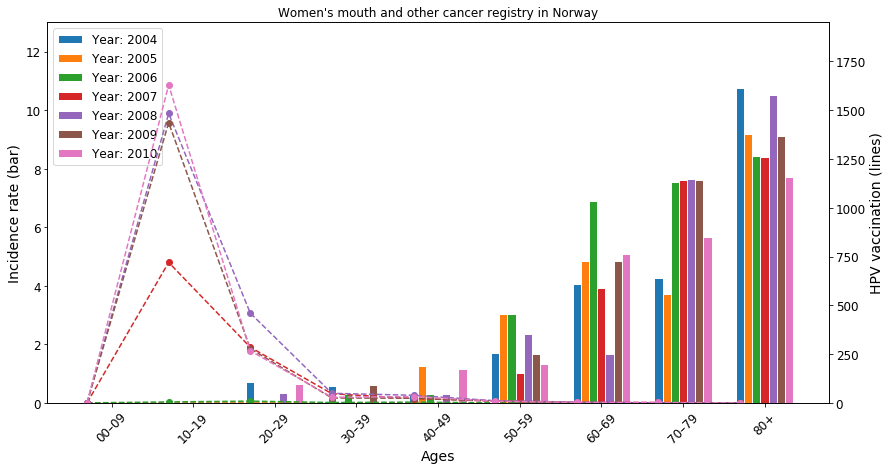

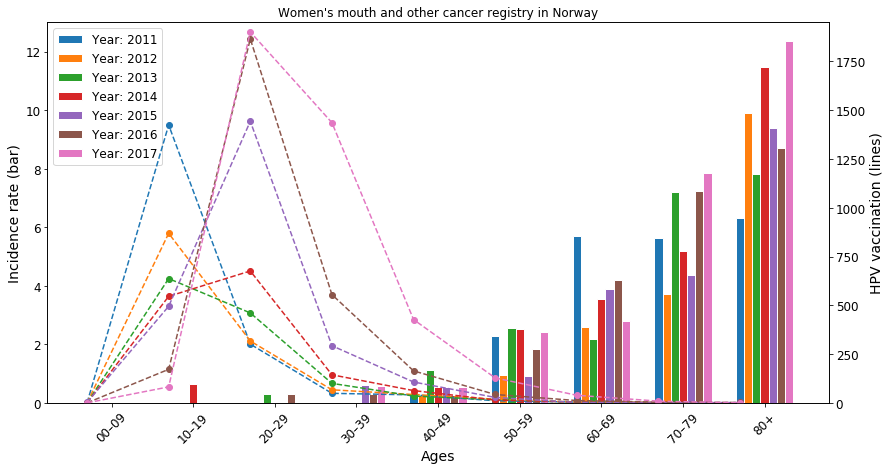

In [19]:
### Mouth and other cancer
#---------------------------------------------------------------------------------------------------------------------
fig, ax = mpf.barplot(ages, c_MO[0:7], 
                      titl="Women's mouth and other cancer registry in Norway", Xlabel='Ages', 
                      Ylabel='Incidence rate (bar)', width = 0.9)
ax.set_ylim([0,13])
ax2 = ax.twinx()
for i in range(7):
    ax2.plot(x, pd_cases[i], 'o--')
ax.legend(labels[0:7])
ax2.set_ylabel('HPV vaccination (lines)')
ax2.set_ylim([0,1950])
fig.savefig("plots/Female/Vaccine_cancer(MouthAndOther)_femalebar1.png")

#
fig, ax = mpf.barplot(ages, c_MO[7:], 
                      titl="Women's mouth and other cancer registry in Norway", Xlabel='Ages', 
                      Ylabel='Incidence rate (bar)', width = 0.9)
ax.set_ylim([0,13])
ax2 = ax.twinx()
for i in range(7, len(c_MO)):
    ax2.plot(x, pd_cases[i], 'o--')
ax.legend(labels[7:])
ax2.set_ylabel('HPV vaccination (lines)')
ax2.set_ylim([0,1950])
fig.savefig("plots/Female/Vaccine_cancer(MouthAndOther)_femalebar2.png")
#---------------------------------------------------------------------------------------------------------------------

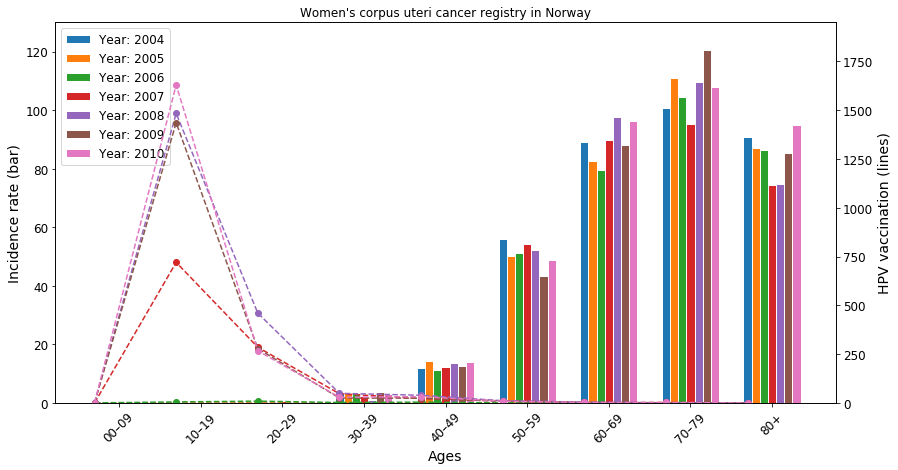

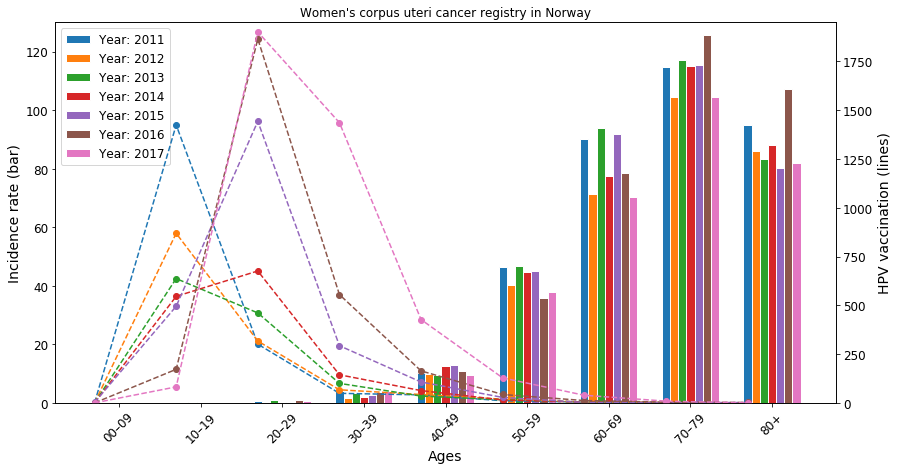

In [20]:
### Corpus uteri cancer
#---------------------------------------------------------------------------------------------------------------------
fig, ax = mpf.barplot(ages, c_livmorlegeme[0:7], titl="Women's corpus uteri cancer registry in Norway", 
                      Xlabel='Ages', Ylabel='Incidence rate (bar)', width = 0.9)
ax.set_ylim([0,130])
ax2 = ax.twinx()
for i in range(7):
    ax2.plot(x, pd_cases[i], 'o--')
ax.legend(labels[0:7])
ax2.set_ylabel('HPV vaccination (lines)')
ax2.set_ylim([0,1950])
fig.savefig("plots/Female/Vaccine_cancer(CorpusUteri)_femalebar1.png")

#
fig, ax = mpf.barplot(ages, c_livmorlegeme[7:], titl="Women's corpus uteri cancer registry in Norway", 
                      Xlabel='Ages', Ylabel='Incidence rate (bar)', width = 0.9)
ax.set_ylim([0,130])
ax2 = ax.twinx()
for i in range(7, len(c_livmorlegeme)):
    ax2.plot(x, pd_cases[i], 'o--')
ax.legend(labels[7:])
ax2.set_ylabel('HPV vaccination (lines)')
ax2.set_ylim([0,1950])
fig.savefig("plots/Female/Vaccine_cancer(CorpusUteri)_femalebar2.png")
#---------------------------------------------------------------------------------------------------------------------

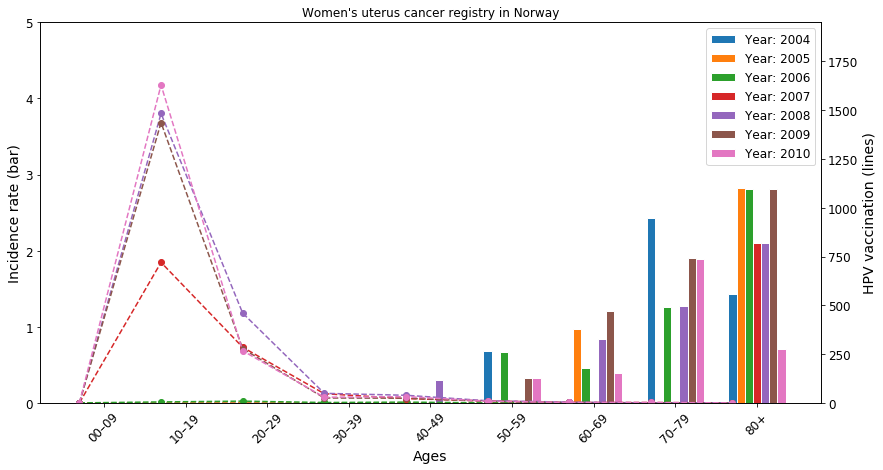

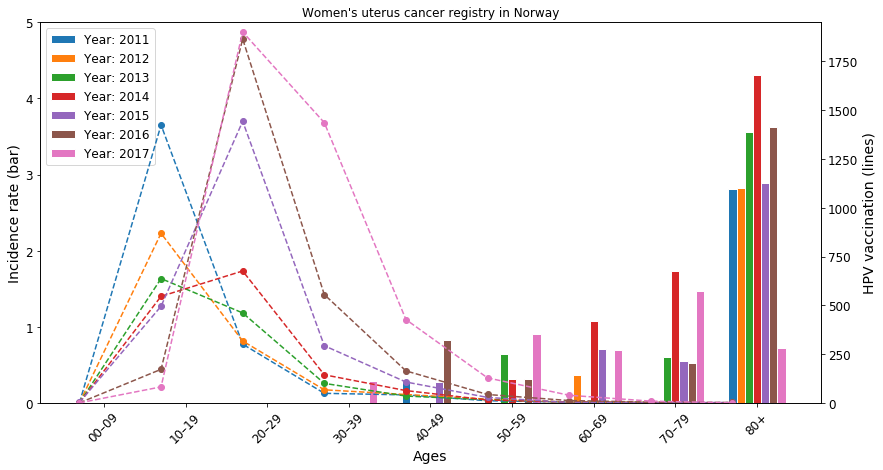

In [21]:
### Uterus cancer
#---------------------------------------------------------------------------------------------------------------------
fig, ax = mpf.barplot(ages, c_livmor[0:7], titl="Women's uterus cancer registry in Norway", 
                      Xlabel='Ages', Ylabel='Incidence rate (bar)', width = 0.9)
ax.set_ylim([0,5])
ax2 = ax.twinx()
for i in range(7):
    ax2.plot(x, pd_cases[i], 'o--')
ax.legend(labels[0:7])
ax2.set_ylabel('HPV vaccination (lines)')
ax2.set_ylim([0,1950])
fig.savefig("plots/Female/Vaccine_cancer(uterus)_femalebar1.png")

#
fig, ax = mpf.barplot(ages, c_livmor[7:], titl="Women's uterus cancer registry in Norway", 
                      Xlabel='Ages', Ylabel='Incidence rate (bar)', width = 0.9)
ax.set_ylim([0,5])
ax2 = ax.twinx()
for i in range(7, len(c_livmor)):
    ax2.plot(x, pd_cases[i], 'o--')
ax.legend(labels[7:])
ax2.set_ylabel('HPV vaccination (lines)')
ax2.set_ylim([0,1950])
fig.savefig("plots/Female/Vaccine_cancer(uterus)_femalebar2.png")
#---------------------------------------------------------------------------------------------------------------------

#### Vaccine and cancer in the same plot (Total for each year)

In [22]:
temp1 = np.zeros(len(c_livmorhals))
temp2 = np.zeros(len(c_livmorhals))
temp3 = np.zeros(len(c_livmorhals))
temp4 = np.zeros(len(c_livmorhals))
temp5 = np.zeros(len(c_livmorhals))
temp6 = np.zeros(len(c_livmorhals))
for iage in range(len(ages)):
    for iyear in range(len(c_livmorhals)):
        temp1[iyear] = temp1[iyear] + pd_cases[iyear][iage]
        temp2[iyear] = temp2[iyear] + c_livmorhals[iyear][iage]
        temp3[iyear] = temp3[iyear] + c_A[iyear][iage]
        temp4[iyear] = temp4[iyear] + c_MO[iyear][iage]
        temp5[iyear] = temp5[iyear] + c_livmorlegeme[iyear][iage]
        temp6[iyear] = temp6[iyear] + c_livmor[iyear][iage]
        
total_pd = temp1
total_c_livmorhals = temp2
total_c_A = temp3
total_c_MO = temp4
total_c_livmorlegeme = temp5
total_c_livmor = temp6

In [23]:
x = np.linspace(0,len(c_livmorhals)-1, len(c_livmorhals))
year_labels = []
for j in range(num_years):
    year_labels.append(''+str(cancer_registry['År'][j])+'')

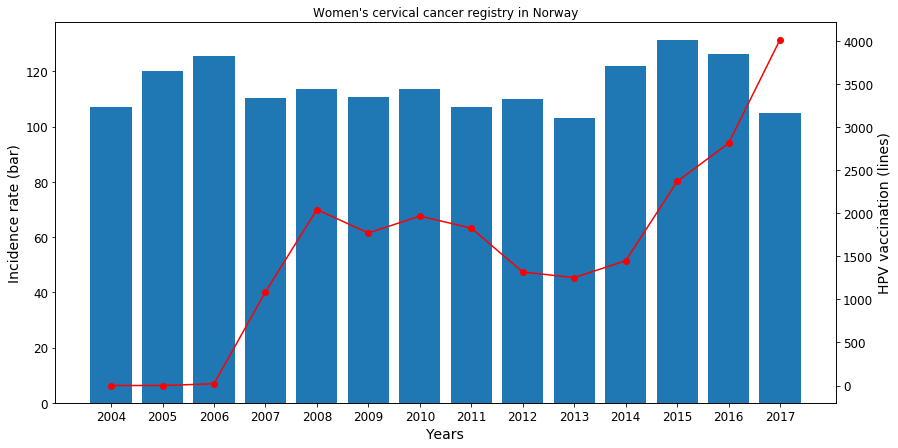

In [24]:
### cervical cancer
fig, ax = mpf.barplot(year_labels, total_c_livmorhals, 
                      titl="Women's cervical cancer registry in Norway", Xlabel='Years', 
                      Ylabel='Incidence rate (bar)', width = 0)
ax2 = ax.twinx()
ax2.plot(x, total_pd, 'ro-')
ax2.set_ylabel('HPV vaccination (lines)')
fig.savefig("plots/Female/Total_Vaccine_cancer(cervical)_female.png")

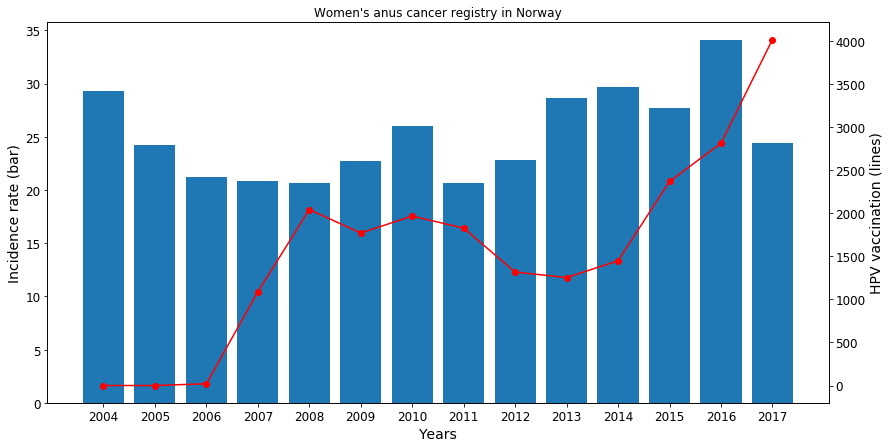

In [25]:
### Anus cancer
fig, ax = mpf.barplot(year_labels, total_c_A, 
                      titl="Women's anus cancer registry in Norway", Xlabel='Years', 
                      Ylabel='Incidence rate (bar)', width = 0)
ax2 = ax.twinx()
ax2.plot(x, total_pd, 'ro-')
ax2.set_ylabel('HPV vaccination (lines)')
fig.savefig("plots/Female/Total_Vaccine_cancer(anus)_female.png")

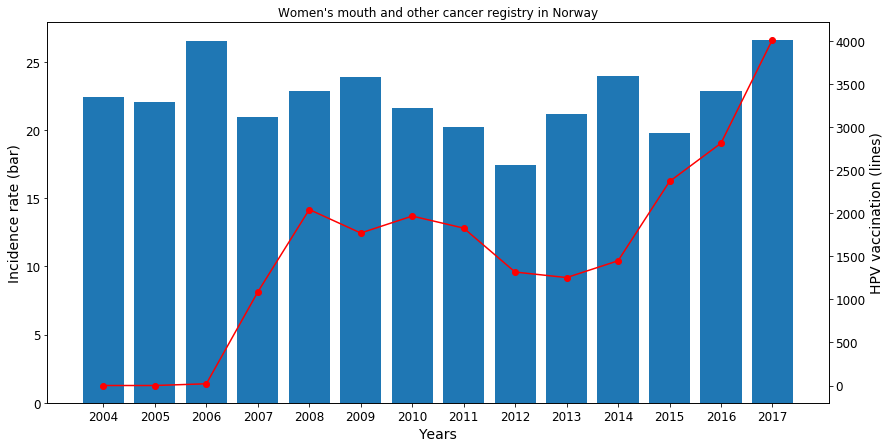

In [26]:
### Mouth and other cancer
fig, ax = mpf.barplot(year_labels, total_c_MO, 
                      titl="Women's mouth and other cancer registry in Norway", Xlabel='Years', 
                      Ylabel='Incidence rate (bar)', width = 0)
ax2 = ax.twinx()
ax2.plot(x, total_pd, 'ro-')
ax2.set_ylabel('HPV vaccination (lines)')
fig.savefig("plots/Female/Total_Vaccine_cancer(MouthAndOther)_female.png")

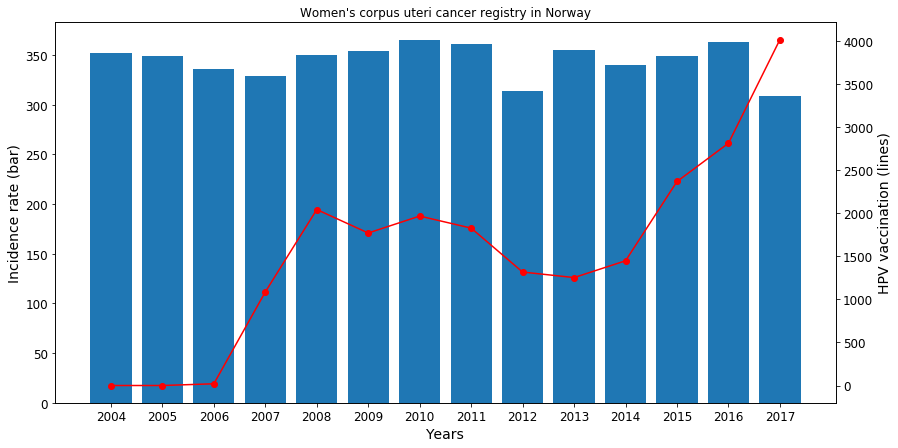

In [27]:
### Corpus uteri cancer
fig, ax = mpf.barplot(year_labels, total_c_livmorlegeme, 
                      titl="Women's corpus uteri cancer registry in Norway", Xlabel='Years', 
                      Ylabel='Incidence rate (bar)', width = 0)
ax2 = ax.twinx()
ax2.plot(x, total_pd, 'ro-')
ax2.set_ylabel('HPV vaccination (lines)')
fig.savefig("plots/Female/Total_Vaccine_cancer(CorpusUteri)_female.png")

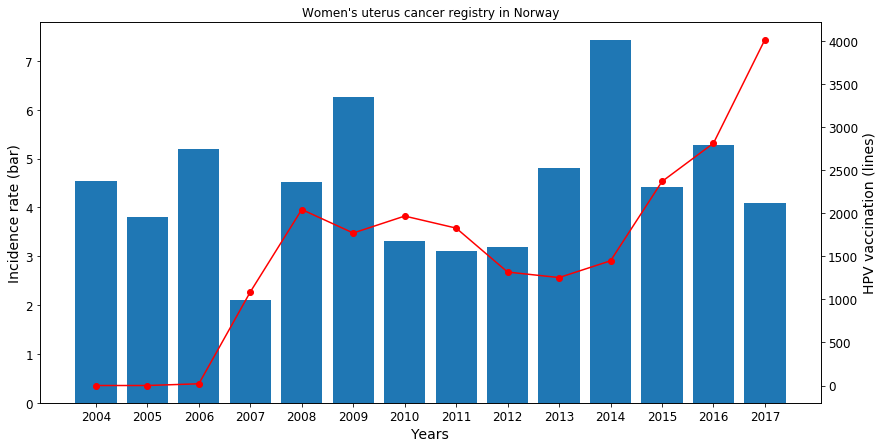

In [28]:
### Uterus cancer
fig, ax = mpf.barplot(year_labels, total_c_livmor, 
                      titl="Women's uterus cancer registry in Norway", Xlabel='Years', 
                      Ylabel='Incidence rate (bar)', width = 0)
ax2 = ax.twinx()
ax2.plot(x, total_pd, 'ro-')
ax2.set_ylabel('HPV vaccination (lines)')
fig.savefig("plots/Female/Total_Vaccine_cancer(uterus)_female.png")

### Incidence rate for each cancer type

In [29]:
from matplotlib.ticker import MaxNLocator

In [30]:
x = np.linspace(0,8,9)
c_label = ['Cervical','Anus','Mouth and other','Corpus uteri','Uterus']
ages = ['as'] + ages

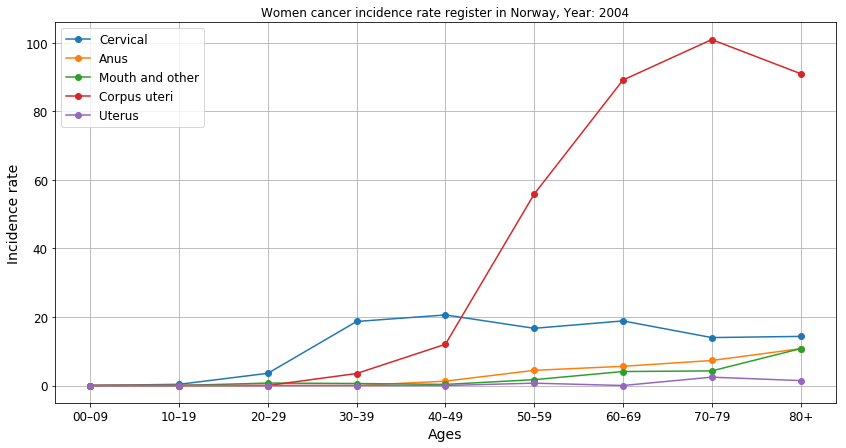

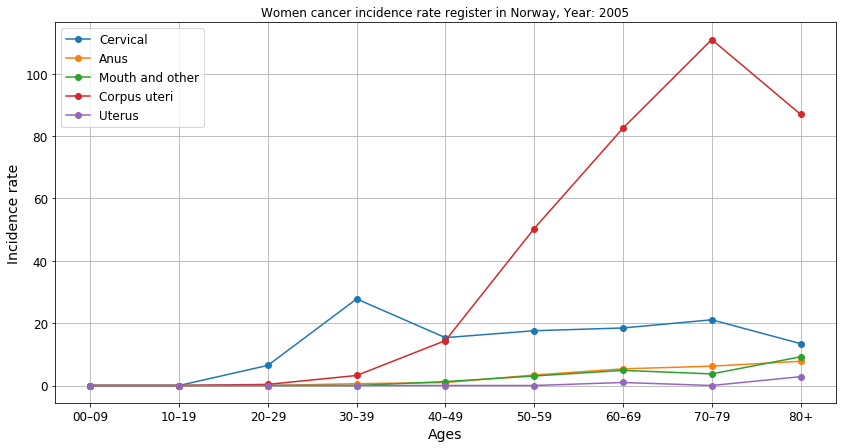

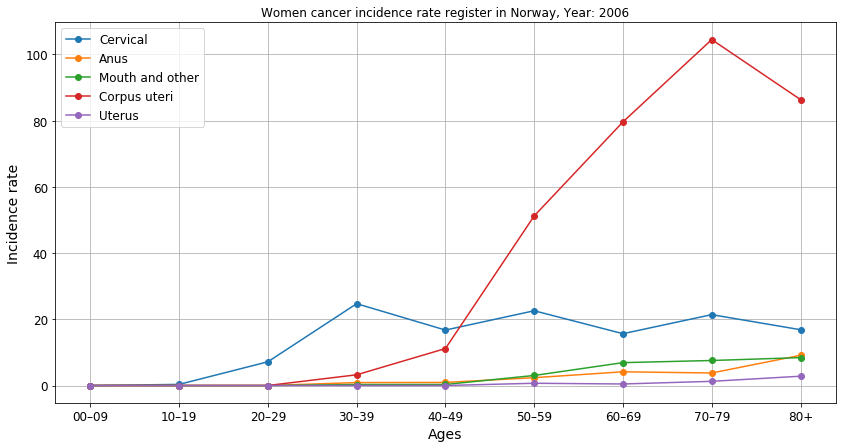

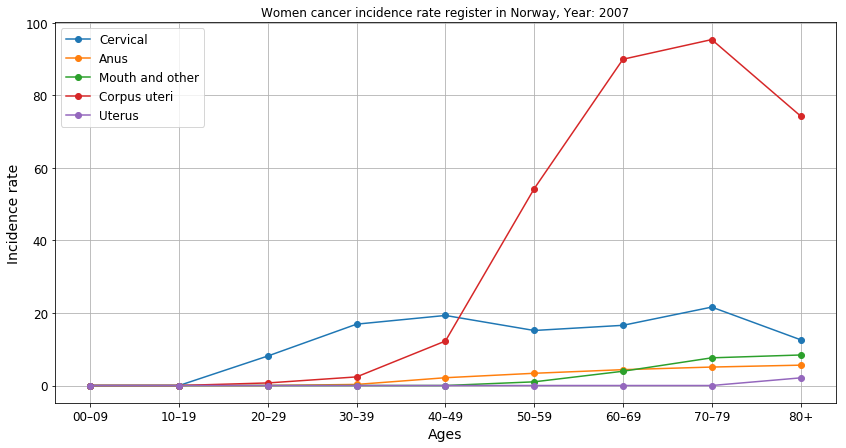

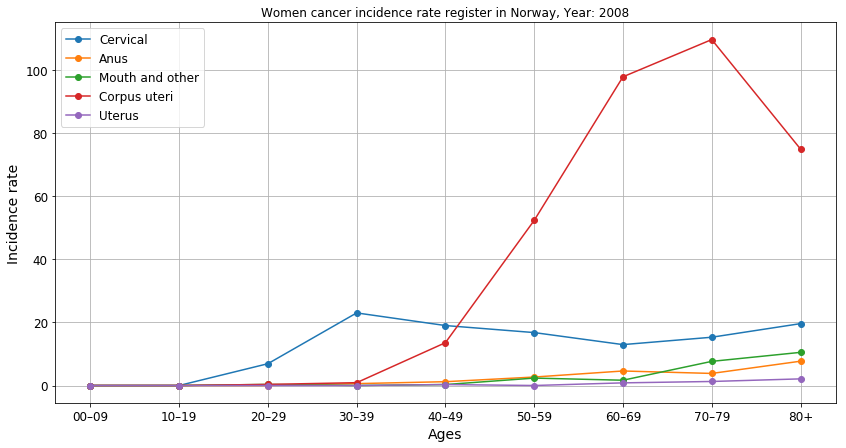

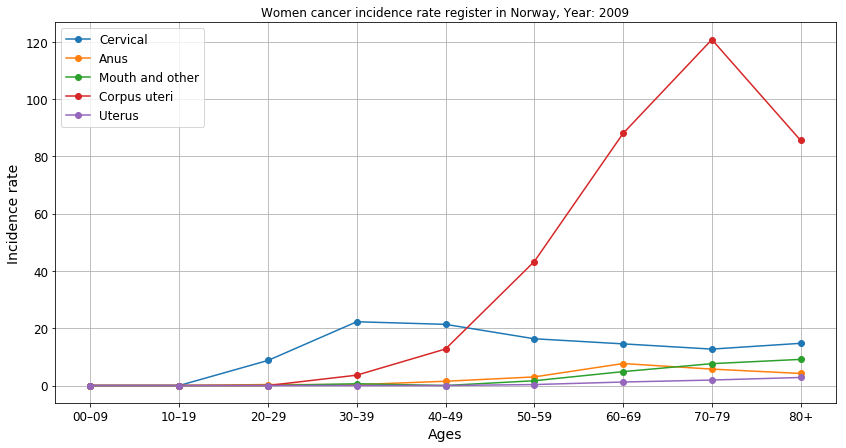

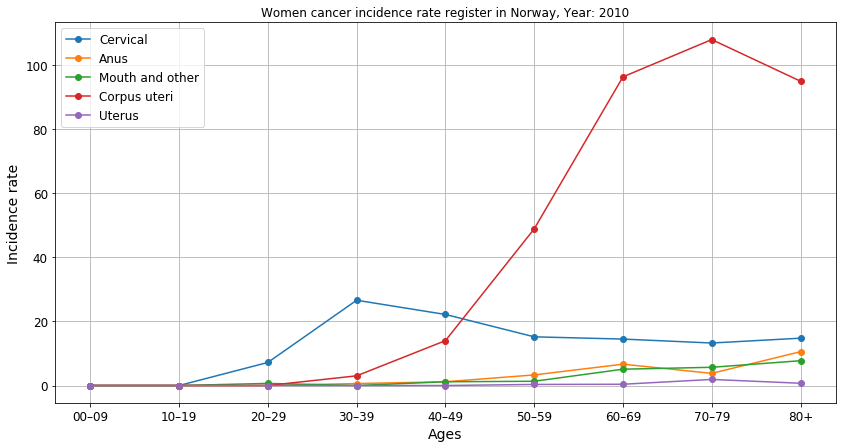

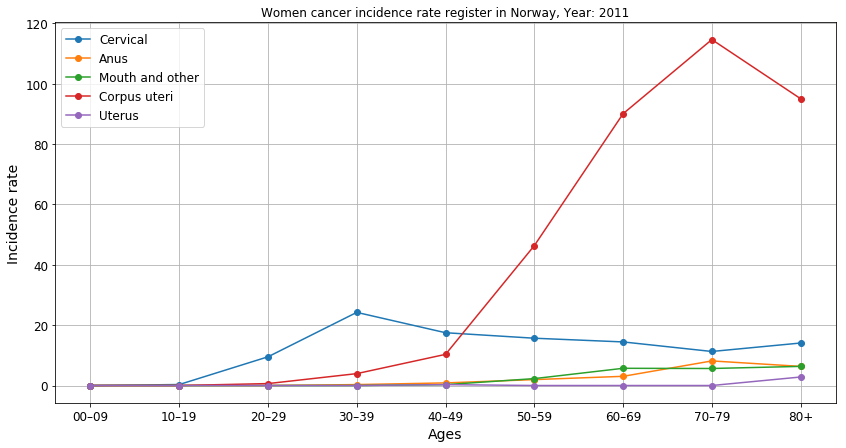

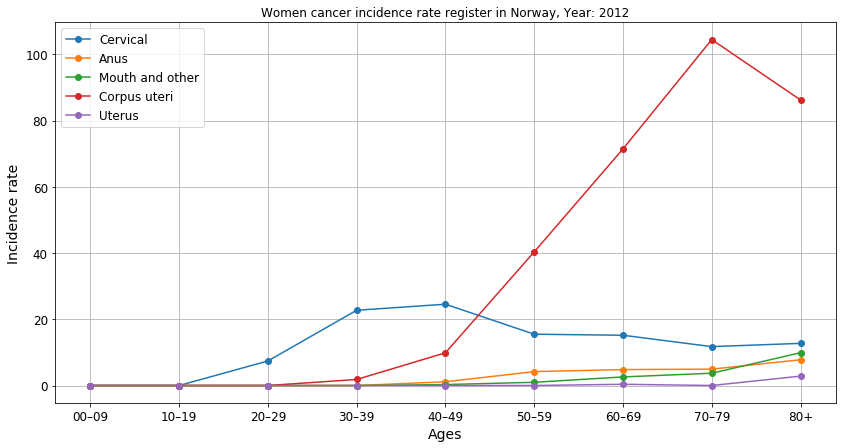

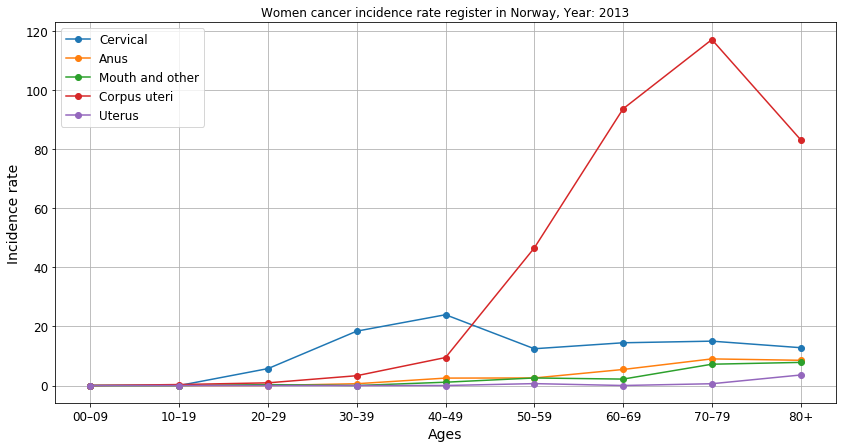

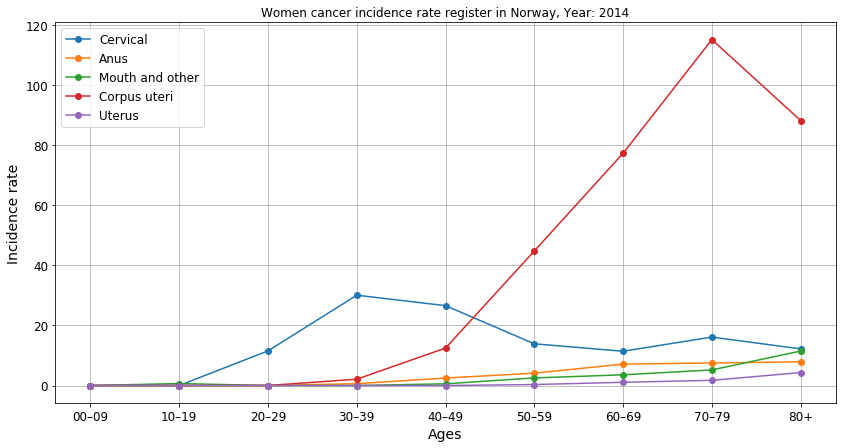

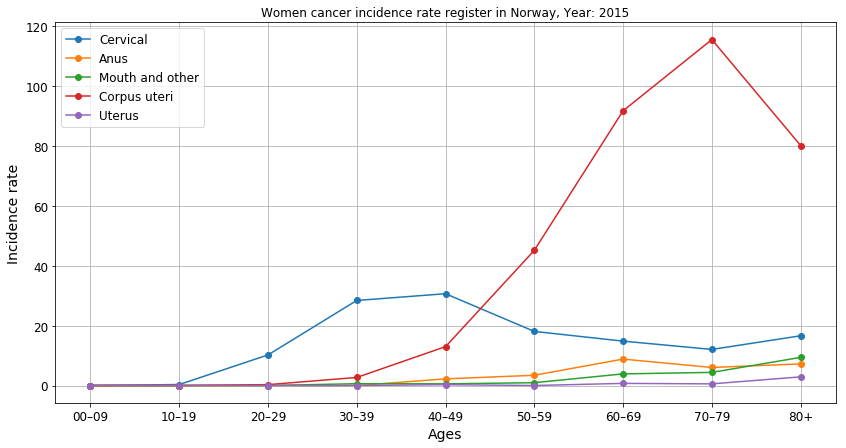

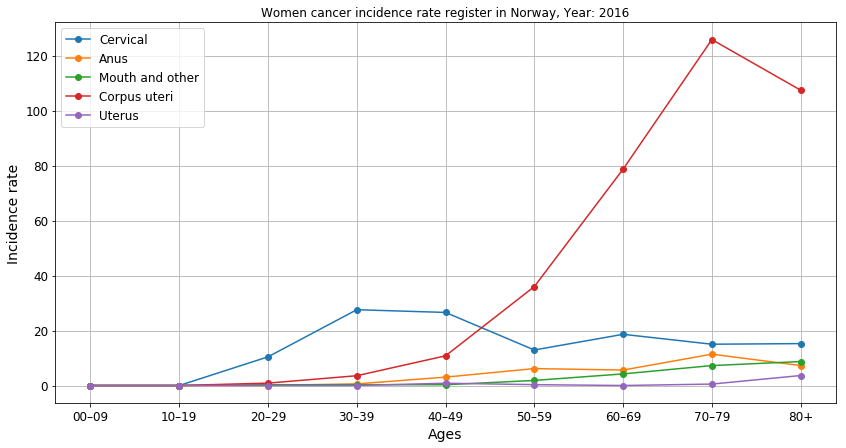

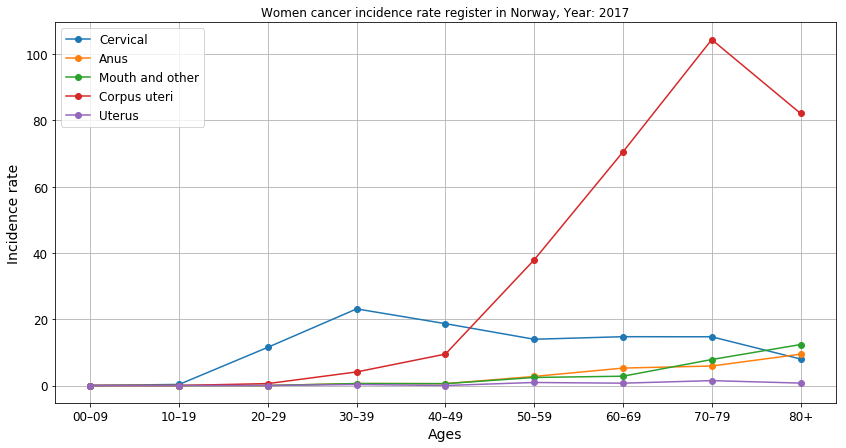

In [31]:
for i in range(len(c_A)):
    fig, ax = mpf.plot(x, c_livmorhals[i], titl='Women cancer incidence rate register in Norway, '+str(labels[i])+'', Xlabel='Ages', 
                   Ylabel='Incidence rate', ltype = 'o-')
    ax.plot(x, c_A[i], 'o-')
    ax.plot(x, c_MO[i], 'o-')
    ax.plot(x, c_livmorlegeme[i], 'o-')
    ax.plot(x, c_livmor[i], 'o-')

    locator=MaxNLocator(nbins=9)
    ax.xaxis.set_major_locator(locator)
    ax.set_xticklabels(ages)
    ax.legend(c_label)
    
    ## saving figure
    fig.savefig("plots/Female/Women_cancer_incidence_"+str(labels[i])+".png")

#### Total per year case

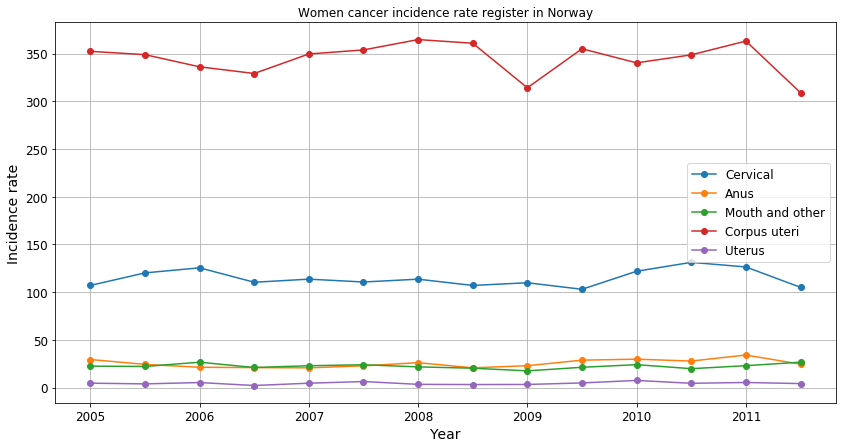

In [32]:
x = np.linspace(0,len(c_livmorhals)-1, len(c_livmorhals))

fig, ax = mpf.plot(x, total_c_livmorhals, titl='Women cancer incidence rate register in Norway', Xlabel='Year', 
                   Ylabel='Incidence rate', ltype = 'o-')
ax.plot(x, total_c_A, 'o-')
ax.plot(x, total_c_MO, 'o-')
ax.plot(x, total_c_livmorlegeme, 'o-')
ax.plot(x, total_c_livmor, 'o-')

locator = MaxNLocator(nbins=9)
ax.xaxis.set_major_locator(locator)
ax.set_xticklabels(year_labels)
ax.legend(c_label)
## saving figure
fig.savefig("plots/Female/Women_cancer_total_incidence(year).png")